In [1]:
import pandas as pd

results_water = pd.read_csv("results.csv")

results_water["method"] = "watershed"

results_water

,name,Dice_coefficient,method
0,2023_12_14_image_005,0.801539,watershed
1,2023_12_14_image_000,0.893167,watershed
2,2023_12_14_image_017,0.874456,watershed
3,2023_12_14_image_018,0.879137,watershed
4,2023_12_14_image_032,0.791995,watershed
5,2023_12_14_image_025,0.930487,watershed
6,2023_12_14_image_038,0.880147,watershed
7,2023_12_14_image_031,0.852582,watershed
8,2023_12_14_image_008,0.896922,watershed
9,2023_12_14_image_024,0.916529,watershed


In [2]:
results_svm = pd.read_csv("results_svm.csv")

results_svm["method"] = "svm"

results_svm

,name,Dice_coefficient,method
0,2023_12_14_image_024,0.876442,svm
1,2023_12_14_image_031,0.884437,svm
2,2023_12_14_image_038,0.875550,svm
3,2023_12_14_image_032,0.872960,svm
4,2023_12_14_image_017,0.856818,svm
5,2023_12_14_image_005,0.865853,svm
6,2023_12_14_image_018,0.870268,svm
7,2023_12_14_image_008,0.866638,svm
8,2023_12_14_image_000,0.831511,svm
9,2023_12_14_image_025,0.853018,svm


In [3]:
results_all = pd.concat([results_water, results_svm])

print(results_all.to_markdown())

|    | name                 |   Dice_coefficient | method    |
|---:|:---------------------|-------------------:|:----------|
|  0 | 2023_12_14_image_005 |           0.801539 | watershed |
|  1 | 2023_12_14_image_000 |           0.893167 | watershed |
|  2 | 2023_12_14_image_017 |           0.874456 | watershed |
|  3 | 2023_12_14_image_018 |           0.879137 | watershed |
|  4 | 2023_12_14_image_032 |           0.791995 | watershed |
|  5 | 2023_12_14_image_025 |           0.930487 | watershed |
|  6 | 2023_12_14_image_038 |           0.880147 | watershed |
|  7 | 2023_12_14_image_031 |           0.852582 | watershed |
|  8 | 2023_12_14_image_008 |           0.896922 | watershed |
|  9 | 2023_12_14_image_024 |           0.916529 | watershed |
|  0 | 2023_12_14_image_024 |           0.876442 | svm       |
|  1 | 2023_12_14_image_031 |           0.884437 | svm       |
|  2 | 2023_12_14_image_038 |           0.87555  | svm       |
|  3 | 2023_12_14_image_032 |           0.87296  | svm 

In [4]:
results_water.describe()

,Dice_coefficient
count,10.000000
mean,0.871696
std,0.045139
min,0.791995
25%,0.858051
50%,0.879642
75%,0.895984
max,0.930487


In [5]:
results_svm.describe()

,Dice_coefficient
count,10.000000
mean,0.865349
std,0.015075
min,0.831511
25%,0.859077
50%,0.868453
75%,0.874902
max,0.884437


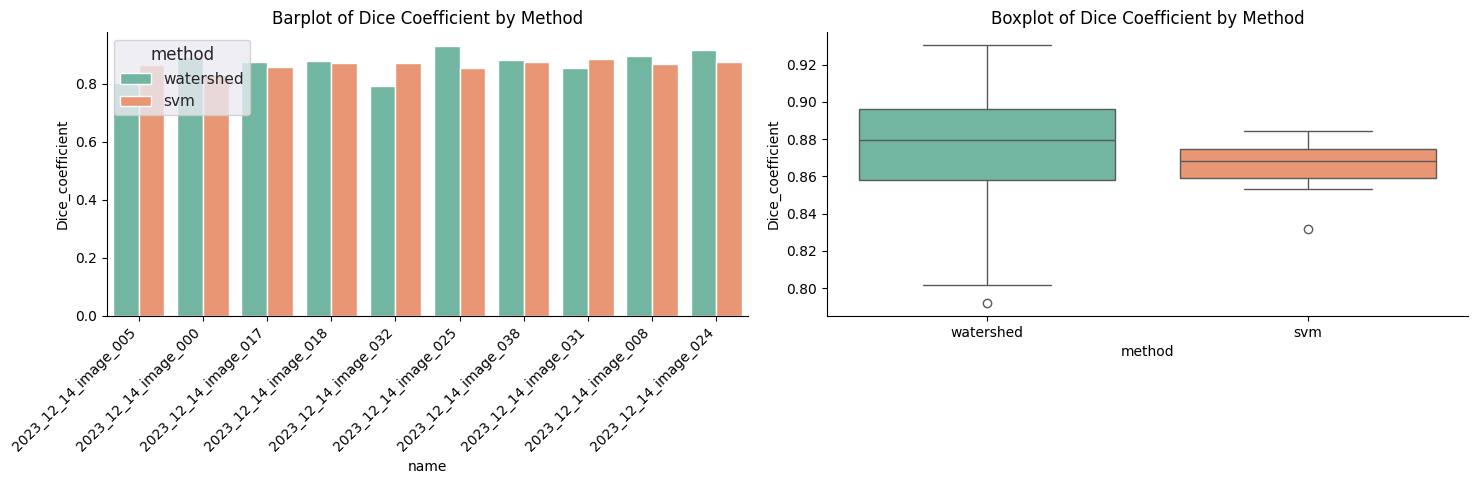

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# remove border
sns.despine()
sns.set_theme()

bar = sns.barplot(ax=axes[0], x="name", y="Dice_coefficient", hue="method", data=results_all, palette="Set2")
axes[0].set_title("Barplot of Dice Coefficient by Method")
axes[0].set_xticks(range(len(results_all["name"].unique())))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.boxplot(ax=axes[1], x="method", y="Dice_coefficient", data=results_all, hue="method", palette="Set2")
axes[1].set_title("Boxplot of Dice Coefficient by Method")

# move legend
sns.move_legend(bar, "upper left")


plt.tight_layout()
plt.show()

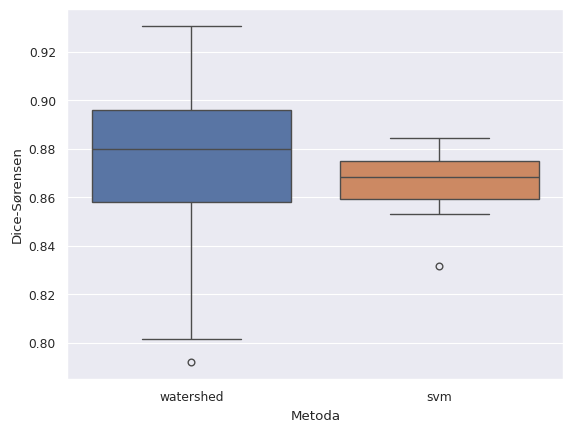

In [22]:
# set theme for article
sns.set_theme(context="paper")

sns.boxplot(x="method", y="Dice_coefficient", data=results_all, hue="method")
plt.ylabel("Dice-Sørensen")
plt.xlabel("Metoda")
plt.show()
